Figure out what minimum budget you need to get a movie with the best chances of success
Group everything by year
add column with percentage of movie budget vs budget for movies that year
add column with percentage of movie grossing worldwide vs grossing worldwide for movies that year
add column that does a ratio for percent budget and percent grossing. budget % / grossing %. sort lowest to greatest to get movies that did the best with lower budgets.

Take buckets to see what percentage of movies did well with different buckets of budget amounts

In [213]:
#Imports
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


In [214]:
def adjust_for_inflation(value_in_dollars, base_year, target_year, inflation_data=None):
    base_cpi = inflation_data[base_year]
    target_cpi = inflation_data[target_year]

    adjusted_income = value_in_dollars * (target_cpi / base_cpi)
    return adjusted_income

cpi_data = pd.read_csv('./Resources/US_inflation_rates.csv')
cpi_data.date = pd.to_datetime(cpi_data.date, format='%Y-%m-%d')
cpi_data = cpi_data.groupby(cpi_data.date.dt.year).mean()

cpi_data = cpi_data['value'].to_dict()

In [215]:
#prepare and save cleaned data csv
%run clean_data.py

Read in Dataframe and analyze data types and info about structure

In [141]:
#Read in the data
imbd_all_years_df = pd.read_csv("./Resources/cleaned_data.csv")

Clean Up Data

In [142]:
#drop all rows that have nan for budget column
budget_df = imbd_all_years_df.dropna(subset=['budget'])
imbd_all_years_df['grossWorldWideAdjusted'] = imbd_all_years_df.apply(lambda x: x['grossWorldWide'] if x['Year'] >= 2023 else adjust_for_inflation(x['grossWorldWide'], int(x['Year']), 2023, cpi_data), axis=1)
imbd_all_years_df['budgetAdjusted'] = imbd_all_years_df.apply(lambda x: x['budget'] if x['Year'] >= 2023 else adjust_for_inflation(x['budget'], int(x['Year']), 2023, cpi_data), axis=1)

# #Add new column for profit
imbd_all_years_df['Profit'] =  imbd_all_years_df['grossWorldWideAdjusted'] - imbd_all_years_df['budgetAdjusted']
#Add new column for profit margin
imbd_all_years_df['Profit Margin'] = imbd_all_years_df['Profit'] / imbd_all_years_df['budgetAdjusted']
#add new column for ratio of budget to grossWorldWide
imbd_all_years_df['Budget to Gross Ratio'] = imbd_all_years_df['budgetAdjusted'] / imbd_all_years_df['grossWorldWideAdjusted']

# 2. Split into 4 quantiles (quartiles)
imbd_all_years_df['Quantile'] = pd.qcut(imbd_all_years_df['budgetAdjusted'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Show quantile distribution
imbd_all_years_df['Quantile'].value_counts()  # Count per quantile
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6064 entries, 0 to 13094
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  6064 non-null   object 
 1   Movie Link             6064 non-null   object 
 2   Year                   6064 non-null   int64  
 3   Duration               6058 non-null   object 
 4   MPA                    5914 non-null   object 
 5   Rating                 6063 non-null   float64
 6   Votes                  6063 non-null   object 
 7   budget                 6064 non-null   float64
 8   grossWorldWide         4756 non-null   float64
 9   gross_US_Canada        4614 non-null   float64
 10  opening_weekend_Gross  4297 non-null   float64
 11  directors              6064 non-null   object 
 12  writers                6064 non-null   object 
 13  stars                  6064 non-null   object 
 14  genres                 6064 non-null   object 
 15  countrie

In [143]:
imdb_all_years_df.dtypes

Title                     object
Movie Link                object
Year                       int64
Duration                  object
MPA                       object
Rating                   float64
Votes                     object
budget                   float64
grossWorldWide           float64
gross_US_Canada          float64
opening_weekend_Gross    float64
directors                 object
writers                   object
stars                     object
genres                    object
countries_origin          object
filming_locations         object
production_companies      object
Languages                 object
wins                       int64
nominations                int64
oscars                     int64
release_date             float64
dtype: object

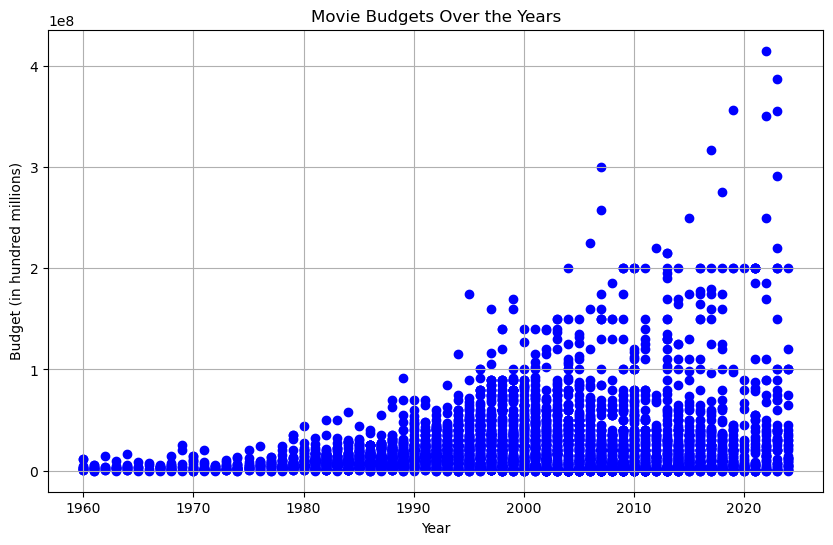

0          5000000.0
5          2000000.0
6           750000.0
8          4000000.0
10        12000000.0
            ...     
12904     22000000.0
12912     30000000.0
12920       500000.0
12876    200000000.0
12944     20000000.0
Name: budget, Length: 4756, dtype: float64

In [151]:
#sort values by year
imbd_all_years_df = imbd_all_years_df.sort_values(by='Year')
imbd_all_years_df.dropna(subset=['Year'])

imbd_all_years_df = imbd_all_years_df.dropna(subset=['budget'])
imbd_all_years_df = imbd_all_years_df.dropna(subset=['grossWorldWide'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(imbd_all_years_df['Year'], imbd_all_years_df['budget'], color='blue')

plt.xlabel("Year")
plt.ylabel("Budget (in hundred millions)")
plt.title("Movie Budgets Over the Years")
plt.grid(True)
plt.show()

imbd_all_years_df['budget']

Group and graph data showing worldwide gross of movies over time

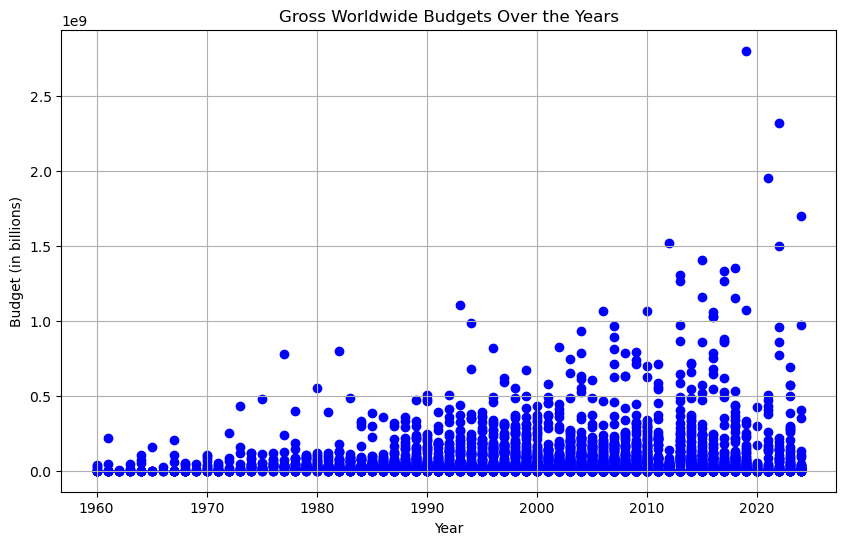

In [145]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(imbd_all_years_df['Year'], imbd_all_years_df['grossWorldWide'], color='blue')

# Annotate each point with the movie title
# for i, row in imbd_all_years_df.iterrows():
#     plt.text(row['Year'], row['budget'], row['Title'], fontsize=9, ha='right')

plt.xlabel("Year")
plt.ylabel("Budget (in billions)")
plt.title("Gross Worldwide Budgets Over the Years")
plt.grid(True)
plt.show()

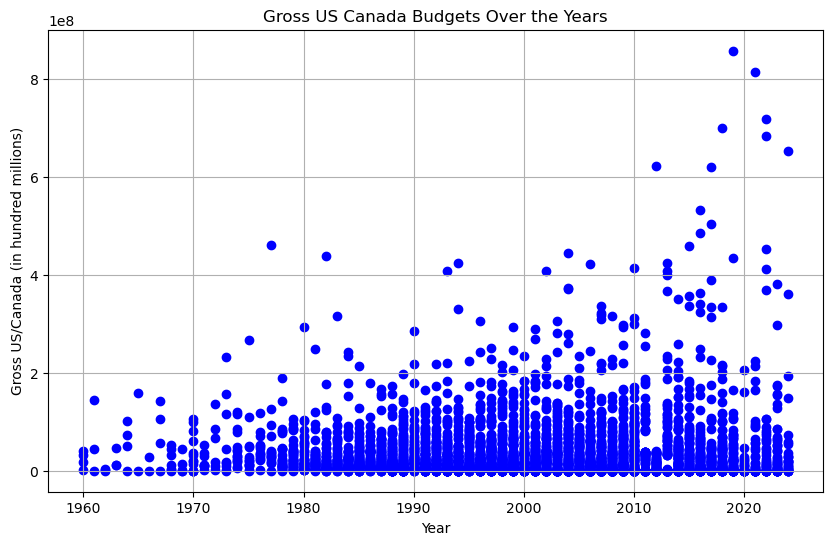

In [146]:
#Plot a bar graph with the year on the x-axis and the gross US on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(imbd_all_years_df['Year'], imbd_all_years_df['gross_US_Canada'], color='blue')

# Annotate each point with the movie title
# for i, row in imbd_all_years_df.iterrows():
#     plt.text(row['Year'], row['budget'], row['Title'], fontsize=9, ha='right')

plt.xlabel("Year")
plt.ylabel("Gross US/Canada (in hundred millions)")
plt.title("Gross US Canada Budgets Over the Years")
plt.grid(True)
plt.show()

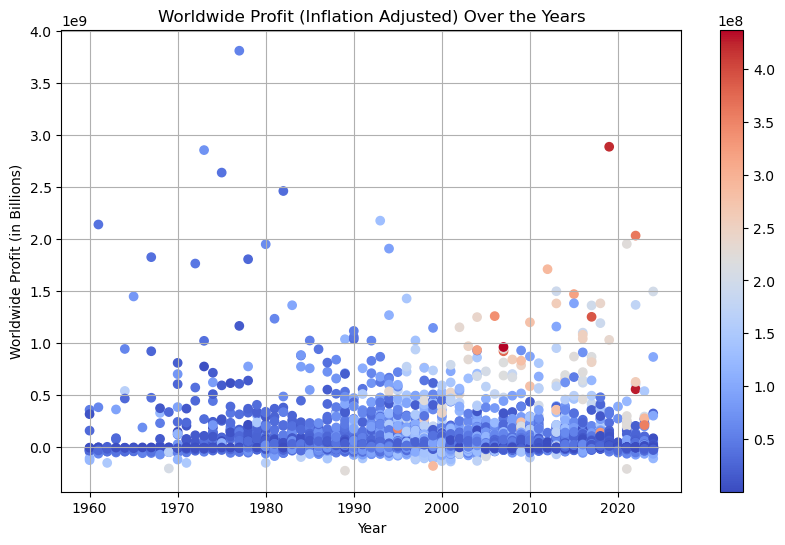

In [165]:
bins = np.array([-300000, 0, 100000, 100000000, 500000000])  # Use y values to define colors
bin_colors = ['red', 'blue', 'green', 'purple', 'orange'] 
budget = imbd_all_years_df['budgetAdjusted']
# Assign each y value to a bin
bin_indices = np.digitize(imbd_all_years_df['grossWorldWideAdjusted'], bins) - 1  # Get bin index for each y value
bin_indices = np.clip(bin_indices, 0, len(bin_colors) - 1)  # Ensure indices are valid

# Normalize budget values for coloring
norm = plt.Normalize(vmin=min(budget), vmax=max(budget))
colormap = plt.cm.coolwarm  # Choose a colormap (e.g., 'plasma', 'coolwarm')

# Map bin indices to colors
colors = [bin_colors[i] for i in bin_indices]

#Plot a bar graph with the year on the x-axis and the gross US on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(imbd_all_years_df['Year'], imbd_all_years_df['Profit'], c=budget, cmap=colormap, norm=norm)
plt.colorbar()  # Optional: Show color legend

plt.xlabel("Year")
plt.ylabel("Worldwide Profit (in Billions)")
plt.title("Worldwide Profit (Inflation Adjusted) Over the Years")
plt.grid(True)
plt.show()

C:\Users\donal\AppData\Local\Temp\ipykernel_8344\1352059756.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_stats = imbd_all_years_df.groupby('Budget_Quantile').apply(lambda group: (group['Profit'] > q1_profit_threshold).mean() * 100)
C:\Users\donal\AppData\Local\Temp\ipykernel_8344\1352059756.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quantile_stats = imbd_all_years_df.groupby('Budget_Quantile').apply(lambda group: (group['Profit'] > q1_profit_threshold).mean() * 100)


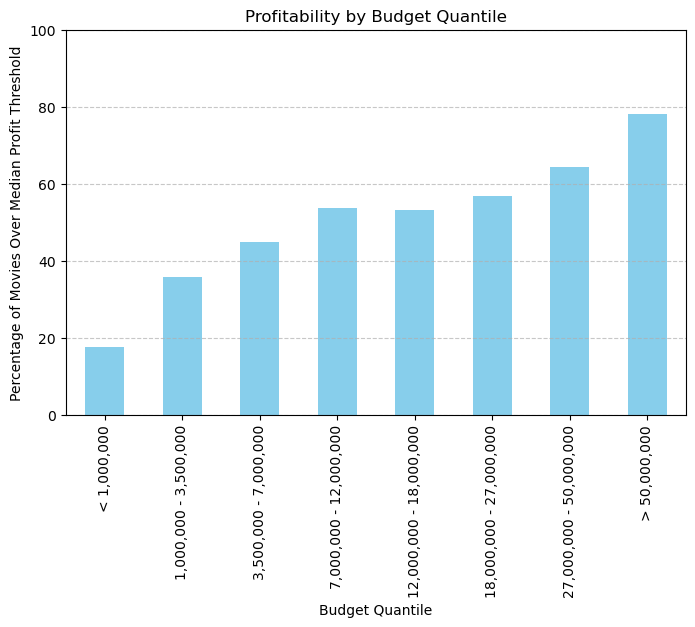

4203.24800054934
4756


In [226]:
#group by quarters, budget, profit, title,

# Step 1: Calculate Q1 profit threshold
#.454 is 4203
q1_profit_threshold = imbd_all_years_df['Profit'].quantile(.5)
budget_quantiles = imbd_all_years_df['budget'].quantile([0.125, 0.25, 0.375, .5,.625, .75, .875, 1.0])  # Get Q1, Q2, Q3, Q4 values
quantile_labels = [f"< {budget_quantiles.iloc[0]:,.0f}"] + \
                  [f"{budget_quantiles.iloc[i]:,.0f} - {budget_quantiles.iloc[i+1]:,.0f}" for i in range(len(budget_quantiles)-2)] + \
                  [f"> {budget_quantiles.iloc[-2]:,.0f}"]

# Step 2: Categorize movies by budget quartiles
imbd_all_years_df['Budget_Quantile'] = pd.qcut(imbd_all_years_df['budget'], q=8, labels=quantile_labels)
imbd_all_years_df['Profit_Quantile'] = pd.qcut(imbd_all_years_df['Profit'], q=20)

# Step 3: Calculate percentage of movies in each budget quantile that exceed the Q1 profit threshold
quantile_stats = imbd_all_years_df.groupby('Budget_Quantile').apply(lambda group: (group['Profit'] > q1_profit_threshold).mean() * 100)

# Step 4: Add this percentage back to the DataFrame
imbd_all_years_df['Percent_Over_Q1_Profit'] = imbd_all_years_df['Budget_Quantile'].map(quantile_stats)

# Step 5: Plot the results as a bar chart
plt.figure(figsize=(8, 5))
quantile_stats.plot(kind='bar', color='skyblue')

plt.xlabel("Budget Quantile")
plt.ylabel("Percentage of Movies Over Median Profit Threshold")
plt.title("Profitability by Budget Quantile")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
print(imbd_all_years_df['Profit'].quantile(.454))
quantile_value = imbd_all_years_df['Profit'].quantile(0.454)  # Get the 45.4th percentile value of Profit
rows_in_quantile = imbd_all_years_df[imbd_all_years_df['Profit'] >= quantile_value]  # Count rows with profit <= the quantile value

print(imbd_all_years_df['Profit'].count())